<a href="https://colab.research.google.com/github/paivaricardo/linear-regression-examples/blob/main/RegressaoLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Primeiro passo: importar os dados do CSV.

In [ ]:
import pandas as pd
dataFrame = pd.read_csv("/content/kc_house_data.csv")
print("Linhas", len(dataFrame))
print("Colunas", len(dataFrame.columns))

Linhas 21613
Colunas 21


uma vez que os dados foram importados para o data frame, vams ver os primeiros registro.

In [ ]:
dataFrame.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Vamos os tipos dos dados de cada coluna do data frame

In [ ]:
dataFrame.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Vimos que os dados foram bem importados. Agora vamos fazer uma análise superficial da correlação.

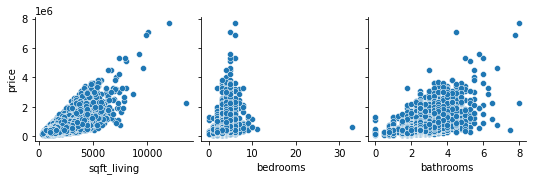

In [ ]:
import seaborn as sb
sb.pairplot(dataFrame,
            x_vars=["sqft_living","bedrooms","bathrooms"],
            y_vars=["price"])

Uma vez que fizemos uma análise da correlação, vamos selecionar um atributo para construirmos uma regressão linear simples. Como a variável sqft_living foi que, aparentemente, teve melhor correlação, vamos utilizá-la.

In [ ]:
#variável INDEPENDENTE
X = dataFrame[["sqft_living"]]
#variável DEPENDENTE
y = dataFrame[["price"]]

Vimos na aula passada que para evitar o overfitting, é aconselhável separar parte dos dados disponíveis para teste.

In [ ]:
from sklearn.model_selection import train_test_split #importação da biblioteca
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
print("Quantidade de registros separados para treinamento: ", len(X_train))
print("Quantidade de registros separados para teste: ", len(X_test))

Quantidade de registros separados para treinamento:  18371
Quantidade de registros separados para teste:  3242


Agora vamos com tudo para a aplicação da Regressão Linear.

In [ ]:
from sklearn.linear_model import LinearRegression # importação do componente que faz regressão linear
objRL = LinearRegression()

Agora que tempos um objeto que é capaz de aplicar Regressão Linear, vamos partir para o teinamento.

In [ ]:
objRL.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

O objeto realizou o treinamento, logo, ele está capaz de prever valores

In [ ]:
#Vamos criar uma variável que irá comportar metragens de casas
data = [
          [1180], #221900.0
          [770], #180000.0
          [2570], #538000.0
          [500] #????
      ]
data

[[1180], [770], [2570], [500]]

Vamos pedir para o motor treinado prever os valores das casas com as metragens informadas na variável data

In [ ]:
objRL.predict(data)

array([[288688.36340816],
       [174289.20558495],
       [676529.41066245],
       [ 98953.17482333]])

Agora, vamos armazenar os valores que o modelo irá prever para as casas que separei para testar o modelo

In [ ]:
y_pred = objRL.predict(X_test)
y_pred

array([[1455001.72853257],
       [ 403087.52123137],
       [ 238464.34290041],
       ...,
       [ 818272.75742876],
       [ 372395.06425441],
       [ 495164.89216224]])

O objeto já foi treinado, vamos avaliar qual foi o gráfico.

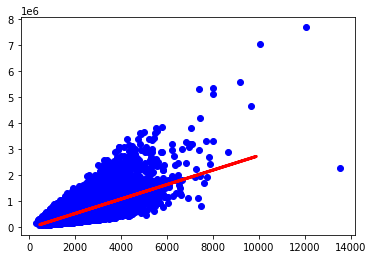

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train, color="blue")
plt.plot(X_test,y_pred, color="red", linewidth=3)
plt.show()

O que é realmente interessante avaliar em uma análise de regressão é a acurácia geral modelo. Na estatística há duas medidas muito utilizada para fazer essa medição: MSE e R2.
O Cientista de Dados tem que buscar o menor MSE possível e o R2 o mais próximo de 1 possível.
Estatísticos afirmam que um modelo de regressão com R2 acima 0.7, é um bom modelo.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print("R2", r2_score(y_test, y_pred))
print("MSE", mean_squared_error(y_test,y_pred))

R2 0.49204955549621165
MSE 76448657990.26205


Aprendemos, acima, como gerar uma regressão linear SIMPLES, que utilizou apenas uma variável independente, que foi a metragem do imóvel.
Agora vamos tentar melhorar a acurácia utilizando mais variáveis independentes.

In [ ]:
X2 = dataFrame[["sqft_living","bathrooms","bedrooms"]]
#variável DEPENDENTE
y2 = dataFrame[["price"]]

Uma vez que selecionamos três variáveis independentes (X2)para guiar a previsão do preço (y2), vamos separar dados de treinamento e de teste.

In [ ]:
from sklearn.model_selection import train_test_split as tts2#importação da biblioteca
X2_train, X2_test, y2_train, y2_test = tts2(X2,y2,test_size=0.20)
print("Quantidade de registros separados para treinamento: ", len(X2_train))
print("Quantidade de registros separados para teste: ", len(X2_test))

Quantidade de registros separados para treinamento:  17290
Quantidade de registros separados para teste:  4323


In [ ]:
Separamos dados de treinamento do de teste. Vamos gerar um novo modelo.

In [ ]:
from sklearn.linear_model import LinearRegression as LR2 # importação do componente que faz regressão linear
objRL2 = LR2()#()
objRL2.fit(X2_train,y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Agora que foi criado um novo objeto, vamos pedir para ele prever os valores dos dados que foram separado para testar o modelo, que estão na variável X2_test

In [ ]:
y2_pred = objRL2.predict(X2_test)
y2_pred
print("R2", r2_score(y2_test, y2_pred))
print("MSE", mean_squared_error(y2_test,y2_pred))

R2 0.5044400859664724
MSE 68253222939.695724


Geramos um modelo com uma variável independes (m2). Depois geramos um modelos com 3 variáveis independetes (m2,num quarto,num banheiros). Agora vamos gerar um modelo com quase todas as variáveis disponívei.

In [ ]:
X3 = dataFrame.drop(columns=["id","date","price"])
#variável DEPENDENTE
y3 = dataFrame[["price"]]

In [ ]:
from sklearn.model_selection import train_test_split as tts3#importação da biblioteca
X3_train, X3_test, y3_train, y3_test = tts3(X3,y3,test_size=0.1)
print("Quantidade de registros separados para treinamento: ", len(X3_train))
print("Quantidade de registros separados para teste: ", len(X3_test))

Quantidade de registros separados para treinamento:  19451
Quantidade de registros separados para teste:  2162


In [ ]:
from sklearn.linear_model import LinearRegression as LR3 # importação do componente que faz regressão linear
objRL3 = LR3()#()
objRL3.fit(X3_train,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y3_pred = objRL3.predict(X3_test)
print("R2", r2_score(y3_test, y3_pred))
print("MSE", mean_squared_error(y3_test,y3_pred))

R2 0.6839232113816389
MSE 46004647854.60191


Para ter uma noção de como está a performance do modelo, vamos gerar gráfico para ver a variação preço previsto x preço real.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


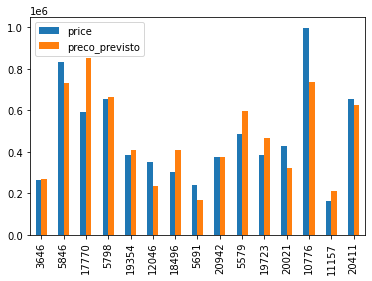

In [ ]:
#y3_test.head()
y3_test["preco_previsto"] = y3_pred
#y3_test.head()
dfAnalise = y3_test.head(15)
dfAnalise.plot(kind="bar")